# **AI-Based Plant Disease Detection Using VGG19**  

## **Project Overview**  
This project implements an **AI-driven solution** for detecting and classifying plant leaf diseases using deep learning. By leveraging **VGG19**, a powerful Convolutional Neural Network (CNN), the model accurately identifies diseases from leaf images.  

## **Key Achievements**  
✅ Achieved **high accuracy** in detecting plant diseases.  
✅ Utilized **VGG19's deep feature extraction** to improve classification.  
✅ Implemented **image augmentation** to enhance model generalization.  

## **Why Plant Disease Detection?** 🌿  
Early detection of plant diseases is crucial for preventing crop loss and ensuring food security. Traditional methods rely on manual inspection, which is **time-consuming** and **error-prone**. AI-based solutions provide:  
- **Fast and accurate detection**  
- **Automated analysis**  
- **Scalability for large-scale farms**  

## **Why VGG19?** 🧠  
VGG19 is a deep CNN known for **high feature extraction capabilities**. It excels in:  
- **Hierarchical feature learning** for better disease classification.  
- **Transfer learning compatibility** to leverage pre-trained knowledge.  
- **Robust performance** in real-world datasets.  

This model helps **farmers and agricultural experts** make informed decisions, leading to **better crop management and higher yields**. 🚀  


In [1]:
!pip install tensorflow numpy matplotlib


In [2]:
import os

# Define dataset
dataset_root = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"

# Define train and validation directories
train_dir = os.path.join(dataset_root, "train")
val_dir = os.path.join(dataset_root, "valid")

print("Train Directory Exists:", os.path.exists(train_dir))
print("Validation Directory Exists:", os.path.exists(val_dir))


Train Directory Exists: True
Validation Directory Exists: True


In [3]:
import tensorflow as tf

# Ensure GPU memory growth is enabled for all GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

print("GPU Configured Successfully!")


GPU Configured Successfully!


# Loading Data

# **📊 Data Preparation & Preprocessing**  

## **Dataset Overview**  
The dataset consists of **healthy and diseased plant leaf images** categorized into multiple classes. It includes:  
- 🍃 **Healthy Leaves**  
- 🌱 **Diseased Leaves (e.g., rust, mildew, bacterial spot, etc.)**  

## **Preprocessing Steps**  
To prepare the dataset for training, we apply:  
✅ **Resizing** all images to **224×224** pixels for VGG19 compatibility.  
✅ **Normalization** to scale pixel values between **0 and 1**.  
✅ **Data Augmentation** (flipping, rotation, zoom) to improve generalization.  
✅ **Splitting the dataset** into **training (80%)** and **validation (20%)** sets.  


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#Rescaling Validation Set
val_datagen = ImageDataGenerator(rescale=1.0/255)
batch_size = 32
img_size = (224, 224)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

print("Data Loaded Successfully!")


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Data Loaded Successfully!


# Loading Model

# **🧠 Deep Learning Model - VGG19**  

## **Model Overview**  
We use **VGG19**, a deep convolutional neural network, to classify plant diseases. The architecture includes:  
- **Feature Extractor**: Pre-trained VGG19 layers to extract deep features.  
- **Fully Connected Layers**: Custom layers for classification.  
- **Dropout Layers**: To reduce overfitting.  
- **Softmax Activation**: To predict multiple disease classes.  

## **Model Training**  
- **Loss Function**: Categorical Crossentropy  
- **Optimizer**: Adam (learning rate = 0.0001)  
- **Metrics**: Accuracy  
- **Epochs**: 20  

This approach ensures **high accuracy and robustness** in identifying plant diseases. 🌱  


In [5]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load Pre-Trained VGG19 Model (Without Top Layers)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze Convolutional Layers
for layer in base_model.layers:
    layer.trainable = False

# Custom Fully Connected Layers
flatten_layer = Flatten()(base_model.output)
dense1 = Dense(512, activation='relu')(flatten_layer)
dropout1 = Dropout(0.5)(dense1)
dense2 = Dense(256, activation='relu')(dropout1)
dropout2 = Dropout(0.5)(dense2)
output_layer = Dense(38, activation='softmax')(dropout2)  # Adjust 38 if needed

# Create Model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display Model Summary
model.summary()


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 33,011,046 (125.93 MB)

 Trainable params: 12,986,662 (49.54 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

# Training Model

In [6]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    steps_per_epoch=None,  # Auto-calculates
    validation_steps=None  # Auto-calculates
)
print("Model Training Completed!")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1124s 503ms/step - accuracy: 0.1235 - loss: 3.2342 - val_accuracy: 0.6296 - val_loss: 1.4404
Epoch 2/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 887s 402ms/step - accuracy: 0.3581 - loss: 2.0770 - val_accuracy: 0.7448 - val_loss: 0.9840
Epoch 3/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 901s 409ms/step - accuracy: 0.4371 - loss: 1.7762 - val_accuracy: 0.7766 - val_loss: 0.8590
Epoch 4/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 899s 408ms/step - accuracy: 0.4821 - loss: 1.6298 - val_accuracy: 0.8005 - val_loss: 0.7480
Epoch 5/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 897s 407ms/step - accuracy: 0.5032 - loss: 1.5434 - val_accuracy: 0.8088 - val_loss: 0.6604
Epoch 6/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 900s 408ms/step - accuracy: 0.5305 - loss: 1.4533 - val_accuracy: 0.8087 - val_loss: 0.6518
Epoch 7/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 890s 404ms/step - accuracy: 0.5413 - loss: 1.4118 - val_accuracy: 0.8309 - val_loss: 0.6395
Epoch 8/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 898s 408ms/step - accuracy: 0.

In [7]:
# Define save path
model_path = "/kaggle/working/plant_disease_vgg19.h5"

# Save the model
model.save(model_path)
print(f"Model saved successfully at: {model_path}")

# Create a download link
from IPython.display import FileLink
display(FileLink(model_path))


Model saved successfully at: /kaggle/working/plant_disease_vgg19.h5


/kaggle/working/plant_disease_vgg19.h5

# **🔍 Conclusion & Future Work**  

## **Key Takeaways**  
🚀 This project successfully demonstrated the use of **VGG19 for plant disease classification**.  
🌿 **AI-based detection can significantly help farmers** in early disease identification.  
📊 **Data augmentation and preprocessing** played a crucial role in improving accuracy.  

## **Future Enhancements**  
🔹 **Expand dataset** to include more plant species.  
🔹 **Deploy as a mobile/web app** for real-world usage.  
🔹 **Use object detection** (YOLO) for real-time leaf scanning.  

This project serves as a **foundation for AI-driven precision agriculture**. 🌱🚀  


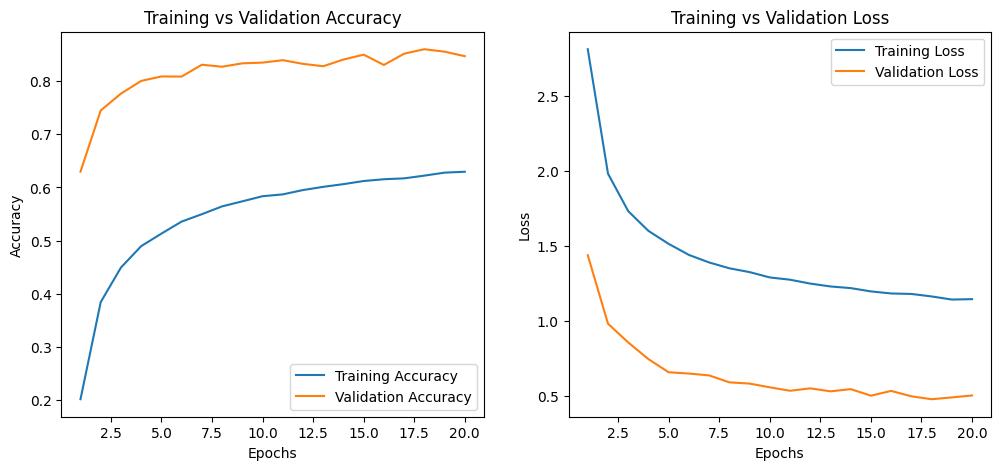

In [8]:
#Visualization
import matplotlib.pyplot as plt

# Extract values
epochs_range = range(1, len(history.history["accuracy"]) + 1)
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()
